# Introduction

Here I want to compute the n-cover times. For my taxi-trip process, as well as the random walk. For N = 1, i expect the random walk to win. I'm hoping that for n > 2, the taxi-trip will do better.

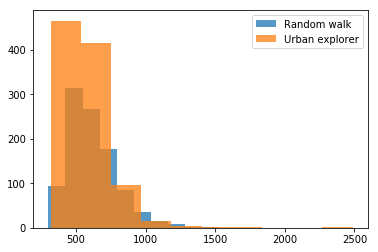

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

N,p = 100, 0.2
G = nx.erdos_renyi_graph(N,p)
G = [c for c in nx.connected_component_subgraphs(G)][0]

num_trials, n = 1000, 1
Ts_rw = f.random_walk_covertime(G,n,num_trials=num_trials)
Ts_ue = f.urban_explorer_covertime(G,n,num_trials=num_trials)
plt.hist(Ts_rw, alpha=0.75);plt.hist(Ts_ue,alpha=0.75);plt.legend(['Random walk','Urban explorer'])
#np.savetxt('data/covertimes_ER_random_walker.txt',Ts_rw)
#np.savetxt('data/covertimes_ER_urban_explorer.txt', Ts_ue)

## Vary N

finished N = 5
finished N = 15
finished N = 25
finished N = 35
finished N = 45
finished N = 55
finished N = 65
finished N = 75
finished N = 85
finished N = 95
finished N = 105
finished N = 115
finished N = 125
finished N = 135
finished N = 145
finished N = 155
finished N = 165
finished N = 175
finished N = 185
finished N = 195
finished N = 205
finished N = 215
finished N = 225
finished N = 235
finished N = 245
finished N = 255
finished N = 265
finished N = 275
finished N = 285
finished N = 295
finished N = 305
finished N = 315
finished N = 325
finished N = 335
finished N = 345
finished N = 355
finished N = 365
finished N = 375
finished N = 385
finished N = 395
finished N = 405
finished N = 415
finished N = 425
finished N = 435
finished N = 445
finished N = 455
finished N = 465
finished N = 475
finished N = 485
finished N = 495


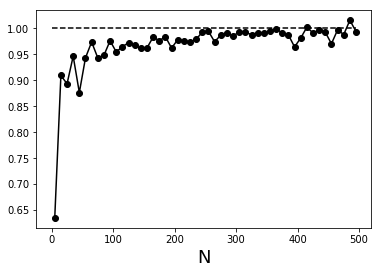

In [13]:
meanTratios = []
Ns = range(5,500,10)
m = 1

for N in Ns:
    num_trials = 1000

    p = 0.4
    G = nx.erdos_renyi_graph(N,p)
    G = [c for c in nx.connected_component_subgraphs(G)][0]
    
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
    print 'finished N = ' + str(N)
plt.plot(Ns,meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

Interesting: the urban explorer is better here too.

In [ ]:
def func(N):
    num_trials = 500

    p, m = 0.5, 1
    G = nx.erdos_renyi_graph(N,p)
    G = [c for c in nx.connected_component_subgraphs(G)][0]
    
    Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
    Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
    return np.mean(Ts_ue)/np.mean(Ts_rw)


from multiprocessing import Pool
workers = Pool(4)

Ns = [500,1000,2000,4000]
ratios = workers.map(func,Ns)
plt.plot(Ns,ratios)

plt.plot(Ns,meanTratios,'ko-')
plt.xlabel('N',fontsize=18)
#plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
plt.hlines(1,0,max(Ns),linestyles='dashed')

Do for different $p$'s

In [ ]:
ps = [0.25,0.5,0.75]

for p in ps:
    meanTratios = []
    Ns = [500,1000,2000]
    m = 1

    for N in Ns:
        num_trials = 10
        G = nx.erdos_renyi_graph(N,p)
        G = [c for c in nx.connected_component_subgraphs(G)][0]
        
        Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
        Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
        meanTratios.append(np.mean(Ts_ue)/np.mean(Ts_rw))
        print 'finished N = ' + str(N)
    plt.plot(Ns,meanTratios,'o-')
    np.savetxt('data/mean_cover_time_ratio_ER_p_' + str(p)+'.txt',meanTratios)
    plt.xlabel('N',fontsize=18)
    #plt.ylabel(' $ \langle T \rangle_{UE} / \langle T \rangle_{RW} $ ')
    plt.hlines(1,0,max(Ns),linestyles='dashed')
    
np.savetxt('data/mean_covertime_ratio_ER_Ns.txt',Ns)
plt.legend(['p = ' +str(i) for i in ps])
#plt.savefig('figures/2dpar_plot_SF.png')

finished N = 500
finished N = 1000


### Two parameters phase diagram

In [66]:
Ns = range(10,90,10)
ps = [0.2,0.4,0.6,0.8]
m = 1
data = np.zeros((len(ps),len(Ns)))

for row,p in enumerate(ps):
    for col,N in enumerate(Ns):
        num_trials = 100
        G = nx.erdos_renyi_graph(N,p)
        G = [c for c in nx.connected_component_subgraphs(G)][0]
        Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
        Ts_ue = f.urban_explorer_covertime(G,m,num_trials=num_trials)
        data[row][col] = np.mean(Ts_ue)/np.mean(Ts_rw)
        #print 'finished N = ' + str(N)

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


pmin,pmax = min(ps),max(ps)
Nmin, Nmax = min(Ns), max(Ns)    
    
norm = MidpointNormalize(midpoint=1)
plt.imshow(data, norm=norm, cmap=plt.cm.seismic, interpolation='none',origin='lower',
           extent=[Nmin,Nmax,pmin,pmax],aspect='auto')
plt.xlabel('$N$',fontsize=18)
plt.ylabel('$p$', fontsize=18)
plt.xticks(Ns)
plt.yticks(ps)
plt.colorbar()

### Startionary densities

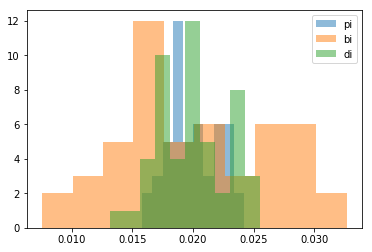

In [8]:
#Make graph
N = 50
p = 0.5
G = nx.erdos_renyi_graph(N,p)
G = [c for c in nx.connected_component_subgraphs(G)][0]

#Run U.E.
N = G.number_of_nodes()
counts = np.zeros(N)
T = 5*10**7
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts = counts / sum(counts)

#Find betweenness
bs = nx.betweenness_centrality(G).values()
bs = np.array(bs) / sum(bs)

#Find degree
ds = np.array([d for n, d in G.degree()])
ds = ds / (1.0*sum(ds))

plt.hist(counts,alpha=0.5)
plt.hist(bs,alpha=0.5)
plt.hist(ds,alpha=0.5)
plt.legend(['pi','bi','di'])

np.savetxt('data/bs_ER.txt',bs)
np.savetxt('data/ds_ER.txt',ds)
np.savetxt('data/ps_ER.txt',counts)

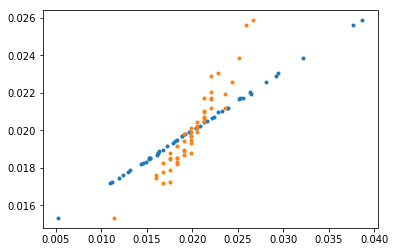

In [7]:
plt.plot(bs,counts,'.')
plt.plot(ds,counts,'.')

In [10]:
bs

array([0.01143759, 0.02570313, 0.01163752, 0.01552208, 0.01675861,
       0.02065504, 0.03264173, 0.01485084, 0.01265026, 0.0210183 ,
       0.01760802, 0.01407687, 0.00997976, 0.01686757, 0.01661995,
       0.01602446, 0.01660753, 0.02646673, 0.01879319, 0.02017269,
       0.02716042, 0.01407842, 0.0188964 , 0.02327069, 0.02870184,
       0.02963438, 0.01710894, 0.02522041, 0.01717473, 0.01640136,
       0.0257091 , 0.01470862, 0.01555159, 0.01552756, 0.0161157 ,
       0.02388483, 0.02530795, 0.03061679, 0.01817186, 0.02805379,
       0.02827116, 0.0223834 , 0.01117666, 0.02819682, 0.02421044,
       0.02800852, 0.00758314, 0.02229085, 0.01932421, 0.02116757])